<a href="https://colab.research.google.com/github/Noahkandie/Covid-19-Tweets-sentiment-analalysis/blob/EDA/WK_Covid_19_Vaccine_tweets_EDA_and_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Instal nltk
# !pip install nltk

In [ ]:

#importing libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk import FreqDist
from matplotlib import pyplot
import plotly.graph_objs as go
#for text pre-processing
import re, string

In [ ]:

#loading files
wk1_eda = pd.read_csv('/content/week_1_clean_data_pre.csv')
wk1_eda_copy=wk1_eda
wk1_eda.head()

,Unnamed: 0,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text
0,0,2020 BioNTech &amp; Pfizer announce their COVI...,"Nairobi, Kenya",2021-11-09 06:41:56,Pfizer-BioNTech,Nairobi,Kenya,2021-11-09 06:41:56,2021,11,9,6,41,biontech amp pfizer announce covid vaccine eff...
1,1,@NamanyaRacheal2 @UgandaBreweries @centurybott...,"Kampala, Uganda",2021-11-09 05:45:27,Pfizer-BioNTech,Kampala,Uganda,2021-11-09 05:45:27,2021,11,9,5,45,namanyaracheal ugandabreweries centurybottling...
2,2,.@MinofHealthUG received a total of 3.4 millio...,"Kampala, Uganda",2021-11-09 05:20:05,Pfizer-BioNTech,Kampala,Uganda,2021-11-09 05:20:05,2021,11,9,5,20,minofhealthug receive total million dose covid...
3,3,@Case18640259 I think pfizer is the worst,"Kampala, Uganda",2021-11-09 05:09:20,Pfizer-BioNTech,Kampala,Uganda,2021-11-09 05:09:20,2021,11,9,5,9,case think pfizer worst
4,4,On Sunday we got more vaccines from @usmission...,soroti,2021-11-09 03:43:24,Pfizer-BioNTech,soroti,Uganda,2021-11-09 03:43:24,2021,11,9,3,43,sunday get vaccine usmissionuganda abt million...


In [ ]:
wk1_eda['week']='Week 1'

In [ ]:
wk1_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2340 non-null   int64 
 1   tweet       2340 non-null   object
 2   location    2294 non-null   object
 3   created_at  2340 non-null   object
 4   vaccine     2340 non-null   object
 5   town        2294 non-null   object
 6   country     2340 non-null   object
 7   date        2340 non-null   object
 8   year        2340 non-null   int64 
 9   month       2340 non-null   int64 
 10  day         2340 non-null   int64 
 11  hour        2340 non-null   int64 
 12  minute      2340 non-null   int64 
 13  clean_text  2340 non-null   object
 14  week        2340 non-null   object
dtypes: int64(6), object(9)
memory usage: 274.3+ KB


In [ ]:
wk1_eda.describe()

,Unnamed: 0,year,month,day,hour,minute
count,2340.000000,2340.0,2340.000000,2340.000000,2340.000000,2340.000000
mean,232.569231,2021.0,10.973077,5.265385,11.052137,29.763675
std,240.347477,0.0,0.161893,4.834154,5.255329,17.215659
min,0.000000,2021.0,10.000000,1.000000,0.000000,0.000000
25%,61.000000,2021.0,11.000000,3.000000,7.000000,15.000000
50%,156.000000,2021.0,11.000000,4.000000,11.000000,30.000000
75%,294.000000,2021.0,11.000000,7.000000,15.000000,45.000000
max,999.000000,2021.0,11.000000,31.000000,23.000000,59.000000


In [ ]:
wk2_eda=pd.read_csv('/content/week_2_clean_data_pre.csv')
wk2_eda.head()

,Unnamed: 0,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week
0,0,"Pfizer, BioNTech &amp; Moderna raking in $1,00...","Kigali ,Rwanda",2021-11-16 20:41:14,Pfizer-BioNTech,Kigali,Rwanda,2021-11-16 20:41:14,2021.0,11.0,16.0,20.0,41.0,pfizer biontech amp moderna rake every second ...,Week 2
1,1,Drugmaker Pfizer Inc. has signed a deal with a...,"📍Africa, Kampala",2021-11-16 20:39:55,Pfizer-BioNTech,📍Africa,Other,2021-11-16 20:39:55,2021.0,11.0,16.0,20.0,39.0,drugmaker pfizer inc sign deal u n back group ...,Week 2
2,2,#UPDATE US pharmaceutical company Pfizer on Tu...,Nairobi,2021-11-16 20:26:53,Pfizer-BioNTech,Nairobi,Kenya,2021-11-16 20:26:53,2021.0,11.0,16.0,20.0,26.0,update u pharmaceutical company pfizer tuesday...,Week 2
3,3,Pfizer to allow generic version of Covid pill ...,"Kampala, Uganda",2021-11-16 19:47:54,Pfizer-BioNTech,Kampala,Uganda,2021-11-16 19:47:54,2021.0,11.0,16.0,19.0,47.0,pfizer allow generic version covid pill countr...,Week 2
4,4,Pfizer said Tuesday it is asking U.S. regulato...,"Little Rock, Ark.",2021-11-16 19:34:17,Pfizer-BioNTech,Little Rock,Other,2021-11-16 19:34:17,2021.0,11.0,16.0,19.0,34.0,pfizer say tuesday ask u regulator authorize e...,Week 2


In [ ]:
wk2_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2290 non-null   int64  
 1   tweet       2290 non-null   object 
 2   location    2249 non-null   object 
 3   created_at  2288 non-null   object 
 4   vaccine     2290 non-null   object 
 5   town        2249 non-null   object 
 6   country     2290 non-null   object 
 7   date        2288 non-null   object 
 8   year        2288 non-null   float64
 9   month       2288 non-null   float64
 10  day         2288 non-null   float64
 11  hour        2288 non-null   float64
 12  minute      2288 non-null   float64
 13  clean_text  2289 non-null   object 
 14  week        2290 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 268.5+ KB


In [ ]:
wk2_eda.describe()

,Unnamed: 0,year,month,day,hour,minute
count,2290.000000,2288.0,2288.0,2288.000000,2288.000000,2288.000000
mean,240.274672,2021.0,11.0,11.763986,11.242133,29.329983
std,248.451210,0.0,0.0,2.369696,5.198292,17.167630
min,0.000000,2021.0,11.0,7.000000,0.000000,0.000000
25%,64.000000,2021.0,11.0,10.000000,7.000000,15.000000
50%,145.000000,2021.0,11.0,11.000000,11.000000,30.000000
75%,337.000000,2021.0,11.0,13.000000,15.000000,44.000000
max,999.000000,2021.0,11.0,16.000000,23.000000,59.000000


In [ ]:
wk3_eda=pd.read_csv('/content/week_3_clean_data_pre.csv')
wk3_eda.head()

,Unnamed: 0,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week
0,0,Graham played a major role in helping @pfizer ...,"Kampala, Uganda",2021-11-23 19:34:44,Pfizer-BioNTech,Kampala,Uganda,2021-11-23 19:34:44,2021,11,23,19,34,graham play major role help pfizer win marketi...,Week 3
1,1,...smarter and ready for success.\n\nGraham sp...,"Kampala, Uganda",2021-11-23 19:34:43,Pfizer-BioNTech,Kampala,Uganda,2021-11-23 19:34:43,2021,11,23,19,34,smarter ready success graham spent year brand ...,Week 3
2,2,@JaneRuth_Aceng Awareness about jabbing center...,kampala uganda,2021-11-23 18:55:02,Pfizer-BioNTech,kampala uganda,Uganda,2021-11-23 18:55:02,2021,11,23,18,55,janeruth aceng awareness jabbing center lack p...,Week 3
3,3,"Astrazeneca, Pfizer, and Johnson &amp;Johnson ...","Kakamega, Kenya",2021-11-23 17:24:04,Pfizer-BioNTech,Kakamega,Kenya,2021-11-23 17:24:04,2021,11,23,17,24,astrazeneca pfizer johnson amp johnson vaccine...,Week 3
4,4,@YittleP @Laurie_Garrett @pfizer Like they're ...,Dar es Salaam,2021-11-23 17:10:44,Pfizer-BioNTech,Dar es Salaam,Other,2021-11-23 17:10:44,2021,11,23,17,10,yittlep laurie garrett pfizer like report er f...,Week 3


In [ ]:
wk3_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3198 non-null   int64 
 1   tweet       3198 non-null   object
 2   location    3168 non-null   object
 3   created_at  3198 non-null   object
 4   vaccine     3198 non-null   object
 5   town        3168 non-null   object
 6   country     3198 non-null   object
 7   date        3198 non-null   object
 8   year        3198 non-null   int64 
 9   month       3198 non-null   int64 
 10  day         3198 non-null   int64 
 11  hour        3198 non-null   int64 
 12  minute      3198 non-null   int64 
 13  clean_text  3198 non-null   object
 14  week        3198 non-null   object
dtypes: int64(6), object(9)
memory usage: 374.9+ KB


In [ ]:
wk3_eda.describe()

,Unnamed: 0,year,month,day,hour,minute
count,3198.000000,3198.0,3198.0,3198.000000,3198.000000,3198.000000
mean,251.129769,2021.0,11.0,20.367104,11.716073,29.204816
std,247.419397,0.0,0.0,2.331263,5.261215,17.163922
min,0.000000,2021.0,11.0,15.000000,0.000000,0.000000
25%,72.000000,2021.0,11.0,19.000000,7.000000,14.000000
50%,174.000000,2021.0,11.0,21.000000,12.000000,29.000000
75%,317.000000,2021.0,11.0,22.000000,16.000000,44.000000
max,1000.000000,2021.0,11.0,24.000000,23.000000,59.000000


In [ ]:
wk4_eda=pd.read_csv('/content/week_4_clean_data_pre.csv')
wk4_eda['week']='Week 4'
wk4_eda.head()

,Unnamed: 0,id,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week
0,0,1465673894472335361,@NationAfrica And yet the other day we got Pfi...,"Nairobi, Kenya",2021-11-30 13:27:42,Pfizer-BioNTech,Nairobi,Kenya,2021-11-30 13:27:42,2021.0,11.0,30.0,13.0,27.0,nationafrica yet day get pfizer vaccine still ...,Week 4
1,1,1465667737183825920,@thetimwork Both received here? I have a pal w...,"Nairobi, Kenya",2021-11-30 13:03:13,Pfizer-BioNTech,Nairobi,Kenya,2021-11-30 13:03:13,2021.0,11.0,30.0,13.0,3.0,thetimwork receive pal get astra dose pfizer s...,Week 4
2,2,1465642442435305472,@KomugishaOlivia Why pfizer?,"Kampala, Uganda",2021-11-30 11:22:43,Pfizer-BioNTech,Kampala,Uganda,2021-11-30 11:22:43,2021.0,11.0,30.0,11.0,22.0,komugishaolivia pfizer,Week 4
3,3,1465640362194710531,@WaitroseTommy @MattGarrahan Implying..in addi...,Kampala,2021-11-30 11:14:27,Pfizer-BioNTech,Kampala,Uganda,2021-11-30 11:14:27,2021.0,11.0,30.0,11.0,14.0,waitrosetommy mattgarrahan imply addition pfiz...,Week 4
4,4,1465627440114503681,@thetimwork @MOH_Kenya Yes you can. If you don...,Kenya,2021-11-30 10:23:06,Pfizer-BioNTech,Kenya,Kenya,2021-11-30 10:23:06,2021.0,11.0,30.0,10.0,23.0,thetimwork moh kenya yes access astrazeneca va...,Week 4


In [ ]:
wk4_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2634 entries, 0 to 2633
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2634 non-null   int64  
 1   id          2634 non-null   object 
 2   tweet       2634 non-null   object 
 3   location    2608 non-null   object 
 4   created_at  2632 non-null   object 
 5   vaccine     2634 non-null   object 
 6   town        2608 non-null   object 
 7   country     2634 non-null   object 
 8   date        2632 non-null   object 
 9   year        2632 non-null   float64
 10  month       2632 non-null   float64
 11  day         2632 non-null   float64
 12  hour        2632 non-null   float64
 13  minute      2632 non-null   float64
 14  clean_text  2633 non-null   object 
 15  week        2634 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory usage: 329.4+ KB


In [ ]:
wk4_eda.describe()

,Unnamed: 0,year,month,day,hour,minute
count,2634.000000,2632.0,2632.00000,2632.000000,2632.000000,2632.000000
mean,278.821944,2021.0,11.00228,26.041413,11.430091,28.715805
std,252.915385,0.0,0.04770,2.959404,5.222278,17.299818
min,0.000000,2021.0,11.00000,1.000000,0.000000,0.000000
25%,87.000000,2021.0,11.00000,24.000000,7.000000,14.000000
50%,202.500000,2021.0,11.00000,26.000000,11.000000,28.000000
75%,379.750000,2021.0,11.00000,28.000000,16.000000,44.000000
max,999.000000,2021.0,12.00000,30.000000,23.000000,59.000000


In [ ]:
wk5_eda=pd.read_csv('/content/week_5_clean_data_pre.csv')
wk5_eda['week']='Week 5'
wk5_eda.head()

,Unnamed: 0,id,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week
0,0,1468515244913750016,Studies from South Africa and Sweden are showi...,"Kota Surabaya, Jawa Timur",2021-12-08 09:38:12,Pfizer-BioNTech,Kota Surabaya,Other,2021-12-08 09:38:12,2021,12,8,9,38,study south africa sweden showing omicron fear...,Week 5
1,1,1468506560616108037,@DrAhmedKalebi Is this a weakness with the Pfi...,Nairobi,2021-12-08 09:03:42,Pfizer-BioNTech,Nairobi,Kenya,2021-12-08 09:03:42,2021,12,8,9,3,drahmedkalebi weakness pfizer vaccine issue ef...,Week 5
2,2,1468503706756857861,The implication of the AHRI study which is in ...,"Nairobi, Kenya",2021-12-08 08:52:21,Pfizer-BioNTech,Nairobi,Kenya,2021-12-08 08:52:21,2021,12,8,8,52,implication ahri study pre print yet peer review,Week 5
3,3,1468502759691505665,Researchers at the African Health Research Ins...,"Nairobi, Kenya",2021-12-08 08:48:36,Pfizer-BioNTech,Nairobi,Kenya,2021-12-08 08:48:36,2021,12,8,8,48,researcher african health research institute a...,Week 5
4,4,1468496895735697409,Pfizer CEO says omicron appears milder but spr...,Nairobi.,2021-12-08 08:25:17,Pfizer-BioNTech,Nairobi.,Kenya,2021-12-08 08:25:17,2021,12,8,8,25,pfizer ceo say omicron appear mild spread fast...,Week 5


In [ ]:
wk5_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2233 non-null   int64 
 1   id          2233 non-null   int64 
 2   tweet       2233 non-null   object
 3   location    2220 non-null   object
 4   created_at  2233 non-null   object
 5   vaccine     2233 non-null   object
 6   town        2220 non-null   object
 7   country     2233 non-null   object
 8   date        2233 non-null   object
 9   year        2233 non-null   int64 
 10  month       2233 non-null   int64 
 11  day         2233 non-null   int64 
 12  hour        2233 non-null   int64 
 13  minute      2233 non-null   int64 
 14  clean_text  2233 non-null   object
 15  week        2233 non-null   object
dtypes: int64(7), object(9)
memory usage: 279.2+ KB


In [ ]:
wk4_eda.describe()

,Unnamed: 0,year,month,day,hour,minute
count,2634.000000,2632.0,2632.00000,2632.000000,2632.000000,2632.000000
mean,278.821944,2021.0,11.00228,26.041413,11.430091,28.715805
std,252.915385,0.0,0.04770,2.959404,5.222278,17.299818
min,0.000000,2021.0,11.00000,1.000000,0.000000,0.000000
25%,87.000000,2021.0,11.00000,24.000000,7.000000,14.000000
50%,202.500000,2021.0,11.00000,26.000000,11.000000,28.000000
75%,379.750000,2021.0,11.00000,28.000000,16.000000,44.000000
max,999.000000,2021.0,12.00000,30.000000,23.000000,59.000000


We concatenate the datasets

In [ ]:
eda=pd.concat([wk1_eda,wk2_eda,wk3_eda,wk4_eda,wk5_eda],ignore_index=True)

In [ ]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12695 entries, 0 to 12694
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12695 non-null  int64  
 1   tweet       12695 non-null  object 
 2   location    12539 non-null  object 
 3   created_at  12691 non-null  object 
 4   vaccine     12695 non-null  object 
 5   town        12539 non-null  object 
 6   country     12695 non-null  object 
 7   date        12691 non-null  object 
 8   year        12691 non-null  float64
 9   month       12691 non-null  float64
 10  day         12691 non-null  float64
 11  hour        12691 non-null  float64
 12  minute      12691 non-null  float64
 13  clean_text  12693 non-null  object 
 14  week        12695 non-null  object 
 15  id          4867 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory usage: 1.5+ MB


In [ ]:
# Drop columns
eda.drop(columns=['Unnamed: 0','id'],inplace=True)
eda.tail()

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week
12690,@nytimes 🙏 Rest in peace. You led your life yo...,"Nairobi, Kenya",2021-12-02 13:36:59,general,Nairobi,Kenya,2021-12-02 13:36:59,2021.0,12.0,2.0,13.0,36.0,nytimes rest peace lead life way honor wish re...,Week 5
12691,We are in the Digital Era brother why wouldn't...,Rwanda,2021-12-02 13:31:41,general,Rwanda,Rwanda,2021-12-02 13:31:41,2021.0,12.0,2.0,13.0,31.0,digital era brother people use smartphone mean...,Week 5
12692,@NimrodKimmanje @DrAyumeCharles @DenisNabz Wor...,Kampala,2021-12-02 12:38:46,general,Kampala,Uganda,2021-12-02 12:38:46,2021.0,12.0,2.0,12.0,38.0,nimrodkimmanje drayumecharles denisnabz worldw...,Week 5
12693,"A superb read from @OAnzala: \n\n""The initial ...",Nairobi Kenya,2021-12-02 12:29:18,general,Nairobi Kenya,Kenya,2021-12-02 12:29:18,2021.0,12.0,2.0,12.0,29.0,superb read oanzala initial work do platform u...,Week 5
12694,Group of 7 (G7): End COVID19 Vaccine Injustice...,"Nairobi, Kenya",2021-12-02 12:11:51,general,Nairobi,Kenya,2021-12-02 12:11:51,2021.0,12.0,2.0,12.0,11.0,group g end covid vaccine injustice vaccine de...,Week 5


In [ ]:
eda.clean_text.dropna(inplace=True,axis=0)

In [ ]:
eda.isna().value_counts()

tweet  location  created_at  vaccine  town   country  date   year   month  day    hour   minute  clean_text  week 
False  False     False       False    False  False    False  False  False  False  False  False   False       False    12536
       True      False       False    True   False    False  False  False  False  False  False   False       False      155
       False     True        False    False  False    True   True   True   True   True   True    True        False        2
       True      True        False    True   False    True   True   True   True   True   True    False       False        1
       False     True        False    False  False    True   True   True   True   True   True    False       False        1
dtype: int64

In [ ]:
eda2=eda.dropna()
eda2

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week
0,2020 BioNTech &amp; Pfizer announce their COVI...,"Nairobi, Kenya",2021-11-09 06:41:56,Pfizer-BioNTech,Nairobi,Kenya,2021-11-09 06:41:56,2021.0,11.0,9.0,6.0,41.0,biontech amp pfizer announce covid vaccine eff...,Week 1
1,@NamanyaRacheal2 @UgandaBreweries @centurybott...,"Kampala, Uganda",2021-11-09 05:45:27,Pfizer-BioNTech,Kampala,Uganda,2021-11-09 05:45:27,2021.0,11.0,9.0,5.0,45.0,namanyaracheal ugandabreweries centurybottling...,Week 1
2,.@MinofHealthUG received a total of 3.4 millio...,"Kampala, Uganda",2021-11-09 05:20:05,Pfizer-BioNTech,Kampala,Uganda,2021-11-09 05:20:05,2021.0,11.0,9.0,5.0,20.0,minofhealthug receive total million dose covid...,Week 1
3,@Case18640259 I think pfizer is the worst,"Kampala, Uganda",2021-11-09 05:09:20,Pfizer-BioNTech,Kampala,Uganda,2021-11-09 05:09:20,2021.0,11.0,9.0,5.0,9.0,case think pfizer worst,Week 1
4,On Sunday we got more vaccines from @usmission...,soroti,2021-11-09 03:43:24,Pfizer-BioNTech,soroti,Uganda,2021-11-09 03:43:24,2021.0,11.0,9.0,3.0,43.0,sunday get vaccine usmissionuganda abt million...,Week 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12690,@nytimes 🙏 Rest in peace. You led your life yo...,"Nairobi, Kenya",2021-12-02 13:36:59,general,Nairobi,Kenya,2021-12-02 13:36:59,2021.0,12.0,2.0,13.0,36.0,nytimes rest peace lead life way honor wish re...,Week 5
12691,We are in the Digital Era brother why wouldn't...,Rwanda,2021-12-02 13:31:41,general,Rwanda,Rwanda,2021-12-02 13:31:41,2021.0,12.0,2.0,13.0,31.0,digital era brother people use smartphone mean...,Week 5
12692,@NimrodKimmanje @DrAyumeCharles @DenisNabz Wor...,Kampala,2021-12-02 12:38:46,general,Kampala,Uganda,2021-12-02 12:38:46,2021.0,12.0,2.0,12.0,38.0,nimrodkimmanje drayumecharles denisnabz worldw...,Week 5
12693,"A superb read from @OAnzala: \n\n""The initial ...",Nairobi Kenya,2021-12-02 12:29:18,general,Nairobi Kenya,Kenya,2021-12-02 12:29:18,2021.0,12.0,2.0,12.0,29.0,superb read oanzala initial work do platform u...,Week 5


In [ ]:
eda['date']=pd.to_datetime(eda[["day", "month", "year"]])

Exploratory Data Analaysis

Nairobi had the most tweets with 4354, Kampala followed with 2453. Kigali , Mombasa and Dar es Salaam had lower numbers, 346,227 and 193 respectively.
Kenya also appears with 1021 tweets. 

Nairobi             4354
Kampala             2453
Kenya               1245
Kigali               346
Mombasa              227
Rwanda               207
Dar es Salaam        193
Nairobi Kenya        131
Kampala - Uganda     125
Arusha               121
Name: town, dtype: int64



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Towns')

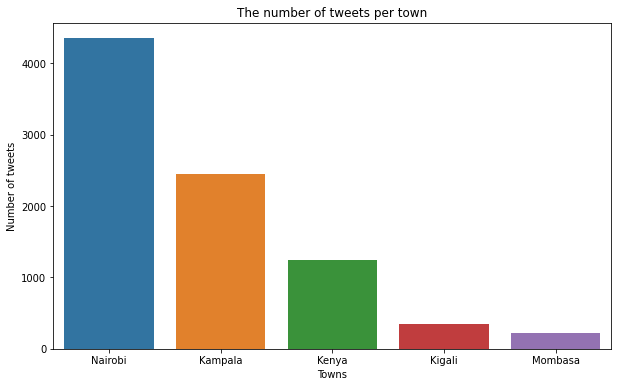

In [ ]:
# checking the number of tweets per town
print(eda['town'].value_counts().iloc[:10])
print('')
a4_dims = (10, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
x= eda.town.value_counts(ascending=False).iloc[:5]
sns.barplot(x.index,x,orient='v')
plt.title('The number of tweets per town')
plt.ylabel('Number of tweets')
plt.xlabel('Towns')

Kenya          7103
Uganda         3517
Other           916
Rwanda          618
Tanzania        461
South Sudan      72
Burundi           7
Ethiopia          1
Name: country, dtype: int64



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of tweets')

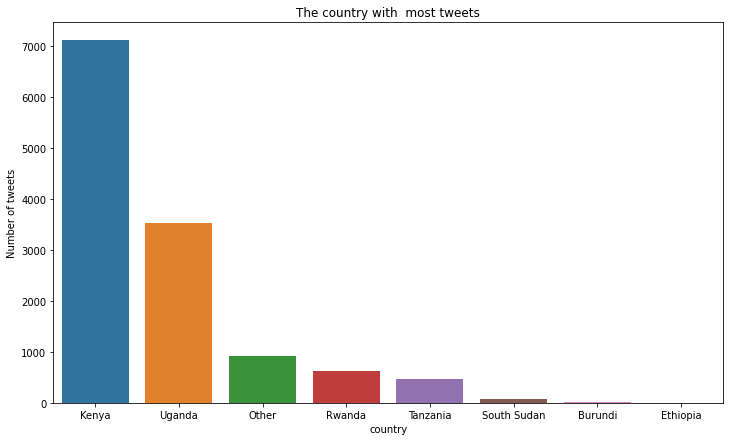

In [ ]:
# checking the Country distribution
print(eda['country'].value_counts().iloc[:10])
print('')
a4_dims = (12, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
x= eda.country.value_counts(ascending=False).iloc[:10]
sns.barplot(x.index,x,orient='v')
plt.title('The country with  most tweets')
plt.gca().set_xlabel('country')
plt.ylabel('Number of tweets')

In [ ]:
print(eda['country'].value_counts().iloc[:10])

Kenya          7103
Uganda         3517
Other           916
Rwanda          618
Tanzania        461
South Sudan      72
Burundi           7
Ethiopia          1
Name: country, dtype: int64


Kenya had the most tweets with 4743 and uganda followed with 2587 tweets respectively. Ethiopia had least with 1 tweet. Tanzania had 214 tweets, this could be attributed to the tweets being tweeted in swahili.  The other countries that are outside East Africa had 779 tweets

general               8916
Johnson & Johnson     1330
Pfizer-BioNTech       1327
oxford/astrazeneca     520
Moderna                445
Sinovac                116
Sputnik                 37
Name: vaccine, dtype: int64



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

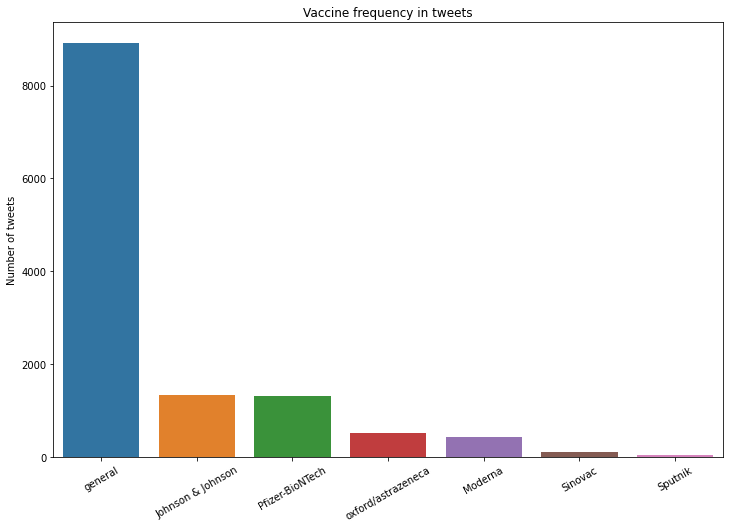

In [ ]:
# Vaccine distributions
from matplotlib import pyplot
print(eda['vaccine'].value_counts().iloc[:12])
print('')

a4_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)

x= eda.vaccine.value_counts(ascending=False).iloc[:8]
sns.barplot( x.index,x,orient='v',ax=ax,)
plt.title('Vaccine frequency in tweets')
plt.gca().set_ylabel('Number of tweets')
plt.xticks(rotation=30, horizontalalignment="center")

Most tweets were about general covid-19 vaccinations. Johnson & Johnson vaccine was the most tweeted about vaccine with 378,  Pfizer/BioNTech followed with 269. Oxford/Astrazeneca had 97 tweets

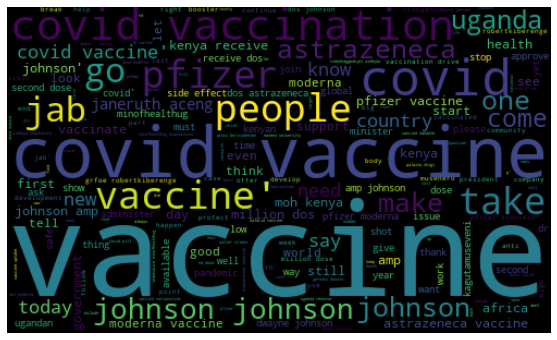

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 

allWords= ''.join( str([twts for twts in wk2_eda['clean_text']] ))
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Vaccines

In [ ]:
eda.vaccine.unique()

array(['Pfizer-BioNTech', 'oxford/astrazeneca', 'Moderna', 'Sinovac',
       'general', 'Sputnik', 'Johnson & Johnson'], dtype=object)

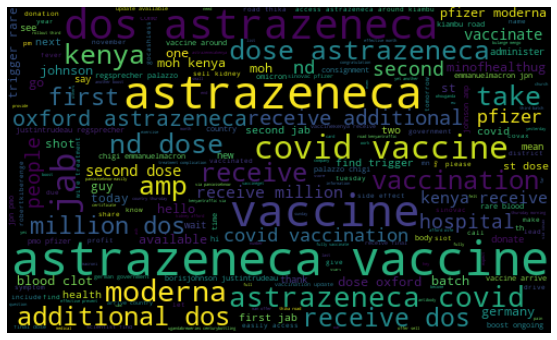

In [ ]:

#plotting the wordcount
from wordcloud import WordCloud 
astr = eda[eda['vaccine'] == 'oxford/astrazeneca' ]
allWords= ''.join( [twts for twts in astr['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)
plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

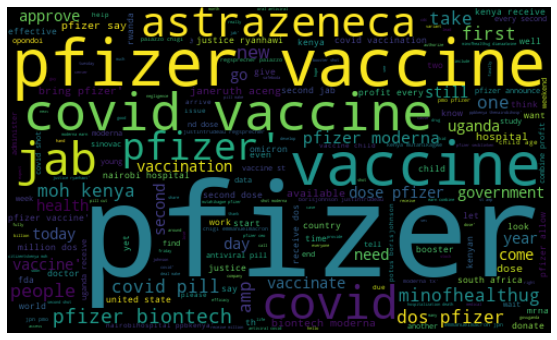

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
a2 = eda[eda['vaccine'] == 'Pfizer-BioNTech' ]
allWords= ''.join( str([twts for twts in a2['clean_text']] ))
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)
plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

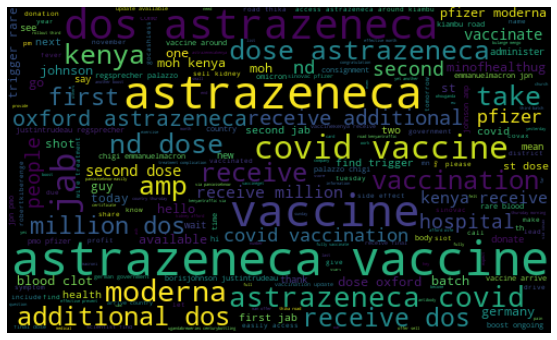

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
a3 = eda[eda['vaccine'] == 'Moderna' ]
allWords= ''.join( [twts for twts in astr['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)
plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

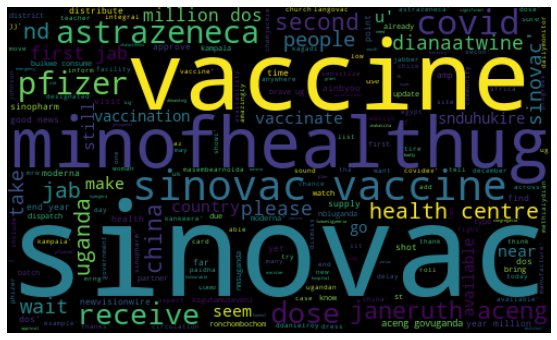

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
a4 = eda[eda['vaccine'] == 'Sinovac' ]
allWords= ''.join(str( [twts for twts in a4['clean_text']] ))
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)
plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

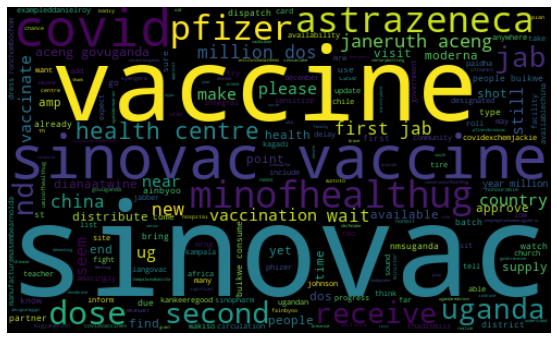

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
a6 = eda[eda['vaccine'] == 'Sinovac' ]
allWords= ''.join( [twts for twts in a6['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)
plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

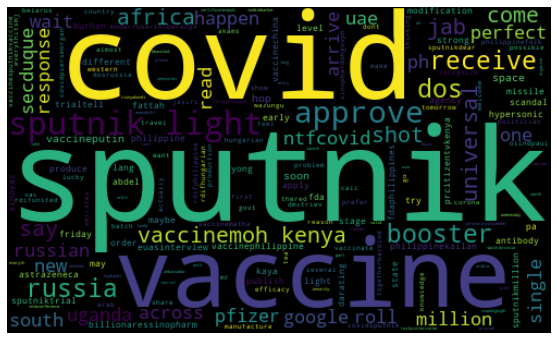

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
a7 = eda[eda['vaccine'] == 'Sputnik' ]
allWords= ''.join( [twts for twts in a7['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)
plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

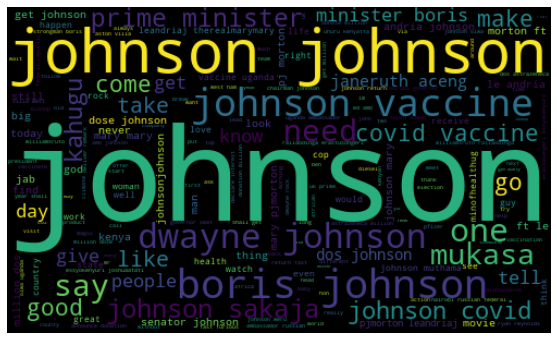

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
a8 = eda[eda['vaccine'] == 'Johnson & Johnson' ]
allWords= ''.join( [twts for twts in a8['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, stopwords=['amp'] ).generate(allWords)
plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
eda.dropna(subset=['hour'],inplace=True)

In [ ]:
eda.shape

(12691, 14)

In [ ]:
eda.head()

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week
0,2020 BioNTech &amp; Pfizer announce their COVI...,"Nairobi, Kenya",2021-11-09 06:41:56,Pfizer-BioNTech,Nairobi,Kenya,2021-11-09,2021.0,11.0,9.0,6.0,41.0,biontech amp pfizer announce covid vaccine eff...,Week 1
1,@NamanyaRacheal2 @UgandaBreweries @centurybott...,"Kampala, Uganda",2021-11-09 05:45:27,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9.0,5.0,45.0,namanyaracheal ugandabreweries centurybottling...,Week 1
2,.@MinofHealthUG received a total of 3.4 millio...,"Kampala, Uganda",2021-11-09 05:20:05,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9.0,5.0,20.0,minofhealthug receive total million dose covid...,Week 1
3,@Case18640259 I think pfizer is the worst,"Kampala, Uganda",2021-11-09 05:09:20,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9.0,5.0,9.0,case think pfizer worst,Week 1
4,On Sunday we got more vaccines from @usmission...,soroti,2021-11-09 03:43:24,Pfizer-BioNTech,soroti,Uganda,2021-11-09,2021.0,11.0,9.0,3.0,43.0,sunday get vaccine usmissionuganda abt million...,Week 1


In [ ]:
eda['hour']=eda['hour'].astype(int)
eda['day']=eda['day'].astype(int)

In [ ]:
# Check the number of tweets per hour
eda['hour'].value_counts()

8     924
7     867
6     849
9     848
18    737
13    731
11    721
10    714
12    704
5     686
16    676
17    640
14    628
15    623
4     505
19    469
20    344
3     300
21    189
22    138
2     115
23    105
1      89
0      89
Name: hour, dtype: int64

In [ ]:
eda['day'].value_counts()

22    1161
23     793
8      718
3      669
21     554
6      550
4      549
2      540
30     514
7      498
5      452
10     421
1      411
29     395
16     389
26     380
11     378
12     322
15     313
27     304
20     303
28     297
17     270
9      246
19     241
13     220
18     216
24     202
25     177
14     145
31      63
Name: day, dtype: int64

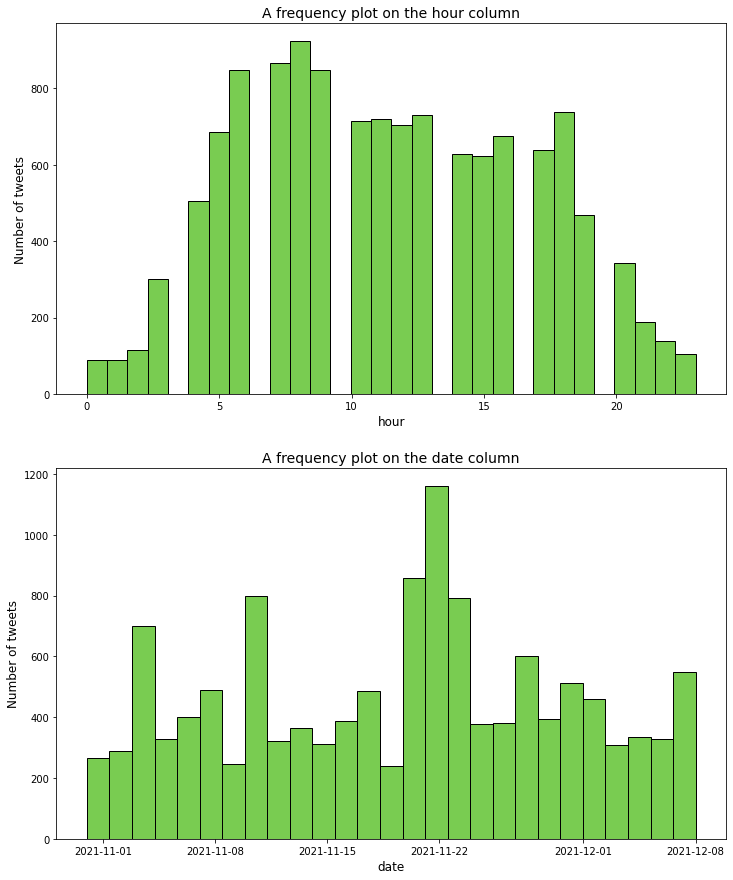

In [ ]:
#boxplot for year and hour column
col_names = ['hour', 'date']
fig, ax = plt.subplots(len(col_names), figsize = (12,15))
for i, col_val in enumerate(col_names):

    sns.histplot(x = eda[col_val], ax=ax[i],color='#4cbb17') 
    ax[i].set_title('A frequency plot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Number of tweets', fontsize=12)
    
plt.show()

Majority of the tweets were tweeted early in the morning at 7-8 am and around 4-5 pm

Sentiment Analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
eda['scores'] = eda['clean_text'].apply(lambda tweet: sid.polarity_scores(tweet))

eda.head()

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week,scores,compound,sentiment,sentiment2
0,2020 BioNTech &amp; Pfizer announce their COVI...,"Nairobi, Kenya",2021-11-09 06:41:56,Pfizer-BioNTech,Nairobi,Kenya,2021-11-09,2021.0,11.0,9,6,41.0,biontech amp pfizer announce covid vaccine eff...,Week 1,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.4767,positive,positive
1,@NamanyaRacheal2 @UgandaBreweries @centurybott...,"Kampala, Uganda",2021-11-09 05:45:27,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,45.0,namanyaracheal ugandabreweries centurybottling...,Week 1,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.3182,positive,positive
2,.@MinofHealthUG received a total of 3.4 millio...,"Kampala, Uganda",2021-11-09 05:20:05,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,20.0,minofhealthug receive total million dose covid...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,neutral
3,@Case18640259 I think pfizer is the worst,"Kampala, Uganda",2021-11-09 05:09:20,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,9.0,case think pfizer worst,Week 1,"{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'comp...",-0.6249,negative,strongly negative
4,On Sunday we got more vaccines from @usmission...,soroti,2021-11-09 03:43:24,Pfizer-BioNTech,soroti,Uganda,2021-11-09,2021.0,11.0,9,3,43.0,sunday get vaccine usmissionuganda abt million...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,neutral


In [ ]:
eda['compound']  = eda['scores'].apply(lambda score_dict: score_dict['compound'])

eda.head()

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week,scores,compound,sentiment,sentiment2
0,2020 BioNTech &amp; Pfizer announce their COVI...,"Nairobi, Kenya",2021-11-09 06:41:56,Pfizer-BioNTech,Nairobi,Kenya,2021-11-09,2021.0,11.0,9,6,41.0,biontech amp pfizer announce covid vaccine eff...,Week 1,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.4767,positive,positive
1,@NamanyaRacheal2 @UgandaBreweries @centurybott...,"Kampala, Uganda",2021-11-09 05:45:27,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,45.0,namanyaracheal ugandabreweries centurybottling...,Week 1,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.3182,positive,positive
2,.@MinofHealthUG received a total of 3.4 millio...,"Kampala, Uganda",2021-11-09 05:20:05,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,20.0,minofhealthug receive total million dose covid...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,neutral
3,@Case18640259 I think pfizer is the worst,"Kampala, Uganda",2021-11-09 05:09:20,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,9.0,case think pfizer worst,Week 1,"{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'comp...",-0.6249,negative,strongly negative
4,On Sunday we got more vaccines from @usmission...,soroti,2021-11-09 03:43:24,Pfizer-BioNTech,soroti,Uganda,2021-11-09,2021.0,11.0,9,3,43.0,sunday get vaccine usmissionuganda abt million...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,neutral


In [ ]:
# Create sentiment by using compound score
# Negative score are less than 0 and positive scores have more than 0, while netral score are equal to 0

eda['sentiment'] = eda['compound'].apply(lambda c: 'positive' if c >0  else 'neutral' if c==0  else 'negative')

#  We create a 5-point likert by indicating how strong a sentiment is negative or positive
eda['sentiment2'] = eda['compound'].apply(lambda c: 'strongly positive' if c >0.5  else 
                                          'positive' if c >0  else 'neutral' if c==0  else 'negative' if c >-0.5  else'strongly negative')
eda.head()

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week,scores,compound,sentiment,sentiment2
0,2020 BioNTech &amp; Pfizer announce their COVI...,"Nairobi, Kenya",2021-11-09 06:41:56,Pfizer-BioNTech,Nairobi,Kenya,2021-11-09,2021.0,11.0,9,6,41.0,biontech amp pfizer announce covid vaccine eff...,Week 1,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.4767,positive,positive
1,@NamanyaRacheal2 @UgandaBreweries @centurybott...,"Kampala, Uganda",2021-11-09 05:45:27,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,45.0,namanyaracheal ugandabreweries centurybottling...,Week 1,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.3182,positive,positive
2,.@MinofHealthUG received a total of 3.4 millio...,"Kampala, Uganda",2021-11-09 05:20:05,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,20.0,minofhealthug receive total million dose covid...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,neutral
3,@Case18640259 I think pfizer is the worst,"Kampala, Uganda",2021-11-09 05:09:20,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,9.0,case think pfizer worst,Week 1,"{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'comp...",-0.6249,negative,strongly negative
4,On Sunday we got more vaccines from @usmission...,soroti,2021-11-09 03:43:24,Pfizer-BioNTech,soroti,Uganda,2021-11-09,2021.0,11.0,9,3,43.0,sunday get vaccine usmissionuganda abt million...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,neutral


In [ ]:
eda['sentiment'].value_counts()

neutral     5532
positive    4484
negative    2675
Name: sentiment, dtype: int64

The tweets with neutral sentiment are 5762, while positive sentiment are 4068. The tweets with the negative sentiment are 2861. 

The majority neutral tweets may be attributed to the facts and campaigns on covid-19 vaccination 

Text(0, 0.5, 'Number of tweets')

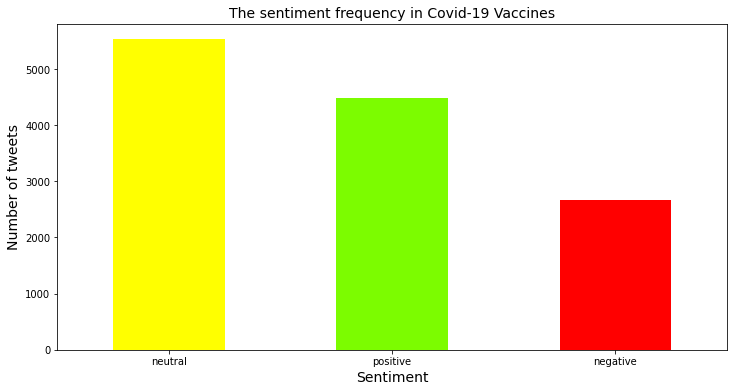

In [ ]:
eda['sentiment'].value_counts().plot(kind='bar',color=['yellow','#7CFC00', 'red'],figsize=(12,6))
plt.title('The sentiment frequency in Covid-19 Vaccines', fontsize=14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Sentiment',fontsize=14)
plt.ylabel('Number of tweets', fontsize=14)

We broaden the scope on the sentiments by splitting negative sentiments and postive sentiments to create a five point likert scale. 
The tweets with neutral sentiments are the most with 5762, positive tweets and negative tweets follow with 2760 and 1921 tweets respectively.  
The tweets with strongly negative tweets are least with 940, while strongly positive tweets number 1308.


In [ ]:
eda['sentiment2'].value_counts()

neutral              5532
positive             3028
negative             1719
strongly positive    1456
strongly negative     956
Name: sentiment2, dtype: int64

Text(0, 0.5, 'Number of tweets')

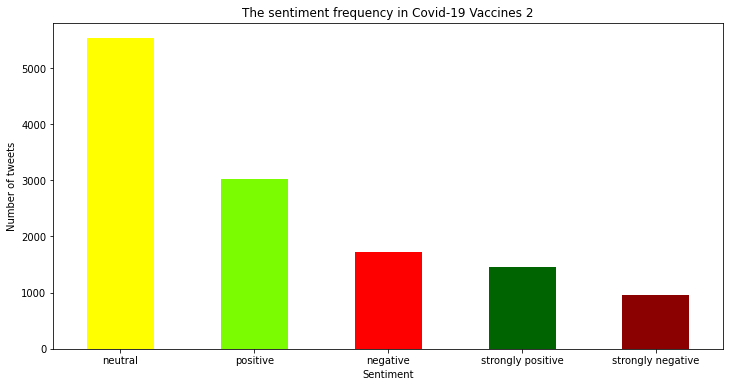

In [ ]:
eda['sentiment2'].value_counts().plot(kind='bar',color=['yellow', '#7CFC00', 'red', '#006400', '#8B0000'],
                                      figsize=(12,6))
plt.title('The sentiment frequency in Covid-19 Vaccines 2')
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')

In [ ]:
## We try to find the relationship between sentiment and vaccine
pd.crosstab(eda['vaccine'],eda['sentiment'])


sentiment,negative,neutral,positive
vaccine,,,
Johnson & Johnson,227,655,448
Moderna,70,225,150
Pfizer-BioNTech,265,608,454
Sinovac,14,59,43
Sputnik,2,25,10
general,2037,3666,3213
oxford/astrazeneca,60,294,166


In [ ]:
vsx=pd.crosstab(eda['vaccine'],eda['sentiment'],normalize=0)
vsx

sentiment,negative,neutral,positive
vaccine,,,
Johnson & Johnson,0.170677,0.492481,0.336842
Moderna,0.157303,0.505618,0.337079
Pfizer-BioNTech,0.199699,0.458176,0.342125
Sinovac,0.120690,0.508621,0.370690
Sputnik,0.054054,0.675676,0.270270
general,0.228466,0.411171,0.360363
oxford/astrazeneca,0.115385,0.565385,0.319231


Text(0, 0.5, 'Proportion of tweets')

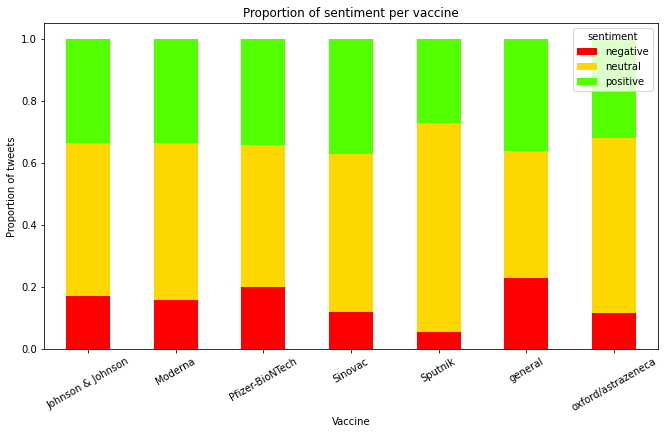

In [ ]:

vsx.plot(kind='bar',stacked=True,   figsize=(11, 6),cmap='prism')
plt.title('Proportion of sentiment per vaccine')
plt.xticks(rotation=30, horizontalalignment="center")
sns.color_palette("rocket")
plt.xlabel('Vaccine')
plt.ylabel('Proportion of tweets')
# plt.bar(X, vsx, color = 'b')
# plt.bar(X, B, color = 'r', bottom = A)

The vaccine with the highest positive sentiment proportion is Sputnik with 37.84%. Oxford/Astrazeneca has the least preference with a 27.69% of its tweets having a positive sentiment. Moderna is close with 28.87% of the tweets having a positive sentiment.  
The general tweets on Covid-19 vaccination have the highest negative tweet percentage of 23.32%. Oxford/Astrazeneca has the least negative proportion of negative tweets of 14.81% of 520 tweets being negative

Text(0, 0.5, 'Proportion of tweets')

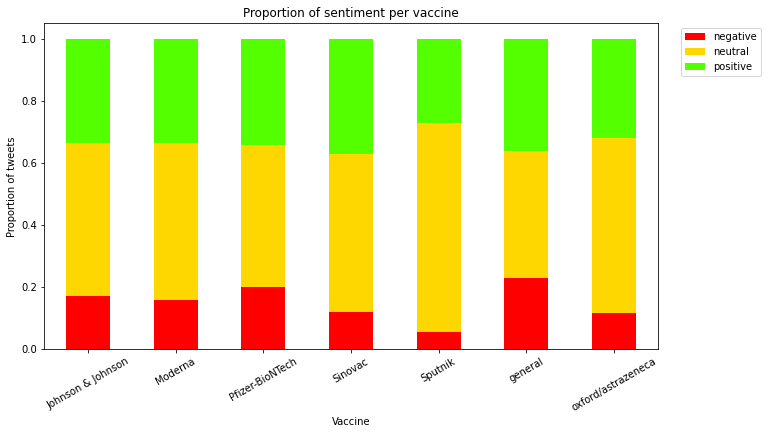

In [ ]:
ax = vsx.plot.bar(stacked=True, edgecolor='none',figsize=(11, 6),colormap='prism')
fig
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))
plt.title('Proportion of sentiment per vaccine')
plt.xticks(rotation=30, horizontalalignment="center")
sns.color_palette("rocket")
plt.xlabel('Vaccine')
plt.ylabel('Proportion of tweets')

Sputnik has the highest positive proportion and lowest negative percentage of tweets. Oxford/Astrazeneca has a high percentage of its tweets  being neutral

In [ ]:
country_sentiment=pd.crosstab(eda['country'],eda['sentiment'])
country_sentiment

sentiment,negative,neutral,positive
country,,,
Burundi,1,1,5
Ethiopia,0,1,0
Kenya,1649,2926,2527
Other,205,399,310
Rwanda,80,327,211
South Sudan,9,39,24
Tanzania,120,141,200
Uganda,611,1698,1207


In [ ]:
csx=pd.crosstab(eda['country'],eda['sentiment'],normalize=0)
csx

sentiment,negative,neutral,positive
country,,,
Burundi,0.142857,0.142857,0.714286
Ethiopia,0.000000,1.000000,0.000000
Kenya,0.232188,0.411997,0.355815
Other,0.224289,0.436543,0.339168
Rwanda,0.129450,0.529126,0.341424
South Sudan,0.125000,0.541667,0.333333
Tanzania,0.260304,0.305857,0.433839
Uganda,0.173777,0.482935,0.343288


Tanzania had the highest positive proportion of its tweets on covid 19 vaccines, with 43.38% of 187 tweets are positive. Kenya, Uganda and Rwanda were followed with percentages of 35.58%, 34.33%  and 34.14% of the tweets being positive respectively.
Of the negative tweets, Tanzania had a greater percentage with 26.03% while Kenya is second with 23.22%. Rwanda and Uganda had less proportions of their tweets being negative with 12.95% and 17.38% respectively

Burundi and South Sudan have few tweets and Ethiopia has a single tweet, hence they are not representative enough of the vaccine attitude in these countries.



In [ ]:
# # import seaborn as sns
# sns.heatmap(pd.crosstab(wk1_eda['country'],wk1_eda['sentiment'],normalize=0,%colors='g))

Text(0, 0.5, 'Number of tweets')

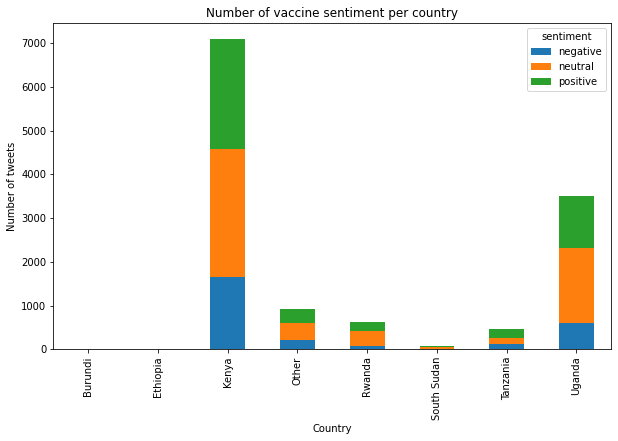

In [ ]:

country_sentiment.plot(kind='bar',stacked=True,   figsize=(10, 6))
plt.title('Number of vaccine sentiment per country')
plt.xlabel('Country')
plt.ylabel('Number of tweets')

Text(0, 0.5, 'Proportion of tweets')

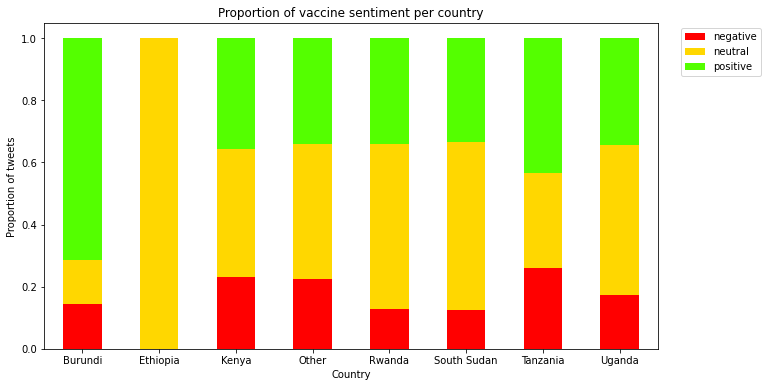

In [ ]:
ax = csx.plot.bar(stacked=True, edgecolor='none',figsize=(11, 6),colormap='prism')
fig
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))
plt.title('Proportion of vaccine sentiment per country')
plt.xticks(rotation=0, horizontalalignment="center")
sns.color_palette("rocket")
plt.xlabel('Country')
plt.ylabel('Proportion of tweets')

In [ ]:
positive_wk=eda[eda['sentiment']=='positive']
neutral_wk=eda[eda['sentiment']=='neutral']
negative_wk=eda[eda['sentiment']=='negative']

In [ ]:
negative_wk

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week,scores,compound,sentiment,sentiment2
3,@Case18640259 I think pfizer is the worst,"Kampala, Uganda",2021-11-09 05:09:20,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,9.0,case think pfizer worst,Week 1,"{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'comp...",-0.6249,negative,strongly negative
5,every vaxx conversation online is just some sl...,rushia,2021-11-09 02:24:33,Pfizer-BioNTech,rushia,Other,2021-11-09,2021.0,11.0,9,2,24.0,every vaxx conversation online slightly skepti...,Week 1,"{'neg': 0.154, 'neu': 0.846, 'pos': 0.0, 'comp...",-0.2516,negative,negative
13,Seven days since I received my 2nd shot of @pf...,"Kampala, Uganda",2021-11-08 14:55:31,Pfizer-BioNTech,Kampala,Uganda,2021-11-08,2021.0,11.0,8,14,55.0,seven day since receive nd shot pfizer covid j...,Week 1,"{'neg': 0.279, 'neu': 0.597, 'pos': 0.124, 'co...",-0.4767,negative,negative
14,Children as low as 12 years are now eligible f...,somewhere in Uganda,2021-11-08 14:41:20,Pfizer-BioNTech,somewhere in Uganda,Uganda,2021-11-08,2021.0,11.0,8,14,41.0,child low year eligible pfizer vaccine getvacc...,Week 1,"{'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'comp...",-0.2732,negative,negative
16,INVESTIGATION – Bill Gates has major shares in...,University of Nairobi,2021-11-08 13:53:48,Pfizer-BioNTech,University of Nairobi,Kenya,2021-11-08,2021.0,11.0,8,13,53.0,investigation bill gate major share pfizer amp...,Week 1,"{'neg': 0.278, 'neu': 0.592, 'pos': 0.13, 'com...",-0.5423,negative,strongly negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,@kemnique sad how some people here tried to de...,Rwanda,2021-12-02 15:05:25,general,Rwanda,Rwanda,2021-12-02,2021.0,12.0,2,15,5.0,kemnique sad people try defend act film poor m...,Week 5,"{'neg': 0.505, 'neu': 0.495, 'pos': 0.0, 'comp...",-0.8481,negative,strongly negative
12676,Opinion | Vaccine Manufacturers Are Profiteeri...,"Kampala, Uganda",2021-12-02 14:53:03,general,Kampala,Uganda,2021-12-02,2021.0,12.0,2,14,53.0,opinion vaccine manufacturer profiteer history...,Week 5,"{'neg': 0.244, 'neu': 0.556, 'pos': 0.2, 'comp...",-0.1027,negative,negative
12677,Global vaccine equity. We need to fight misinf...,"Kampala, Uganda",2021-12-02 14:26:19,general,Kampala,Uganda,2021-12-02,2021.0,12.0,2,14,26.0,global vaccine equity need fight misinformatio...,Week 5,"{'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compou...",-0.5994,negative,strongly negative
12681,Group of 7 (G7): End COVID19 Vaccine Injustice...,"Nairobi, Eastleigh",2021-12-02 14:06:55,general,Nairobi,Kenya,2021-12-02,2021.0,12.0,2,14,6.0,group g end covid vaccine injustice vaccine de...,Week 5,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.8126,negative,strongly negative


In [ ]:
positive_wk.shape,neutral_wk.shape,negative_wk.shape

((4484, 18), (5532, 18), (2675, 18))

In [ ]:
#  Check the datasets after splitting on sentiments
positive_wk.sample(10)

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week,scores,compound,sentiment,sentiment2
9274,President Uhuru: The Covid-19 vaccine is the m...,"Nairobi, Kenya",2021-11-30 13:26:51,general,Nairobi,Kenya,2021-11-30,2021.0,11.0,30,13,26.0,president uhuru covid vaccine powerful weapon ...,Week 4,"{'neg': 0.169, 'neu': 0.615, 'pos': 0.215, 'co...",0.1531,positive,positive
8218,"Moderna continued rallying, jumping more than ...",Nairobi.,2021-11-29 13:54:17,Moderna,Nairobi.,Kenya,2021-11-29,2021.0,11.0,29,13,54.0,moderna continue rally jump early morning trad...,Week 4,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.5267,positive,strongly positive
10058,.... every country has a certain level of vacc...,NaN,2021-11-28 03:47:50,general,NaN,Other,2021-11-28,2021.0,11.0,28,3,47.0,every country certain level vaccine hesitancy ...,Week 4,"{'neg': 0.158, 'neu': 0.667, 'pos': 0.175, 'co...",0.0516,positive,positive
1532,"For communities, it is very relaxing when you ...",Tanzania,2021-11-06 05:05:08,general,Tanzania,Tanzania,2021-11-06,2021.0,11.0,6,5,5.0,community relax get meet usual environment nor...,Week 1,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.4404,positive,positive
5682,Join us for a walk at 8:30AM from PHD to Koble...,"Mombasa, Kenya",2021-11-16 03:41:58,general,Mombasa,Kenya,2021-11-16,2021.0,11.0,16,3,41.0,join u walk phd koblenz hall diabetes hyperten...,Week 3,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.2960,positive,positive
11848,China's president promises Africa 1bn Covid va...,"Nairobi, Kenya",2021-12-02 20:34:31,general,Nairobi,Kenya,2021-12-02,2021.0,12.0,2,20,34.0,china president promise africa bn covid vaccin...,Week 5,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...",0.3182,positive,positive
1534,@IsaacSsemakadde We stop winning mbu let's wai...,Kampala,2021-11-06 04:43:07,general,Kampala,Uganda,2021-11-06,2021.0,11.0,6,4,43.0,isaacssemakadde stop win mbu let wait experime...,Week 1,"{'neg': 0.138, 'neu': 0.625, 'pos': 0.237, 'co...",0.3818,positive,positive
10057,@JonMouline Rationalizing exclusion is rationa...,"nairobi, kenya",2021-11-28 03:48:19,general,nairobi,Kenya,2021-11-28,2021.0,11.0,28,3,48.0,jonmouline rationalize exclusion rationalize v...,Week 4,"{'neg': 0.185, 'neu': 0.588, 'pos': 0.227, 'co...",0.1280,positive,positive
859,NMS also listed a good number of health facili...,"Nairobi, Kenya",2021-11-05 03:19:39,general,Nairobi,Kenya,2021-11-05,2021.0,11.0,5,3,19.0,nm also list good number health facility offer...,Week 1,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.4939,positive,positive
8084,@McShayneX @citizentvkenya @MOH_Kenya @mutahik...,"Mombasa, Kenya.",2021-11-21 18:53:47,Pfizer-BioNTech,Mombasa,Kenya,2021-11-21,2021.0,11.0,21,18,53.0,mcshaynex citizentvkenya moh kenya mutahikagwe...,Week 4,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.6369,positive,strongly positive


In [ ]:
neutral_wk.head()

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week,scores,compound,sentiment,sentiment2
2,.@MinofHealthUG received a total of 3.4 millio...,"Kampala, Uganda",2021-11-09 05:20:05,Pfizer-BioNTech,Kampala,Uganda,2021-11-09,2021.0,11.0,9,5,20.0,minofhealthug receive total million dose covid...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,neutral
4,On Sunday we got more vaccines from @usmission...,soroti,2021-11-09 03:43:24,Pfizer-BioNTech,soroti,Uganda,2021-11-09,2021.0,11.0,9,3,43.0,sunday get vaccine usmissionuganda abt million...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,neutral
6,Covid Vaccination Drive Gets over 3.4 Million ...,"Masaka, Uganda",2021-11-09 01:43:45,Pfizer-BioNTech,Masaka,Uganda,2021-11-09,2021.0,11.0,9,1,43.0,covid vaccination drive get million pfizer vac...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,neutral
7,@UCUniversity Guys are asking for Johnson. \nB...,"Kampala, Uganda",2021-11-08 20:47:55,Pfizer-BioNTech,Kampala,Uganda,2021-11-08,2021.0,11.0,8,20,47.0,ucuniversity guy ask johnson pfizer astrazenaca,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,neutral
8,"You dismiss AstraZeneca, sinovac,and Pfizer, w...",In your head,2021-11-08 18:58:56,Pfizer-BioNTech,In your head,Other,2021-11-08,2021.0,11.0,8,18,58.0,dismiss astrazeneca sinovac pfizer wait vaccin...,Week 1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,neutral


In [ ]:
negative_wk.sample(10
  
)

,tweet,location,created_at,vaccine,town,country,date,year,month,day,hour,minute,clean_text,week,scores,compound,sentiment,sentiment2
9828,Instead of threatening citizens with essential...,Kenya,2021-11-29 09:34:39,general,Kenya,Kenya,2021-11-29,2021.0,11.0,29,9,34.0,instead threaten citizen essential service den...,Week 4,"{'neg': 0.184, 'neu': 0.638, 'pos': 0.177, 'co...",-0.0258,negative,negative
9702,@AfricisOrg The outrage is about 'vaccine dipl...,"Nairobi, Kenya",2021-11-30 01:01:11,general,Nairobi,Kenya,2021-11-30,2021.0,11.0,30,1,1.0,africisorg outrage vaccine diplomacy lock down,Week 4,"{'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'comp...",-0.5106,negative,strongly negative
5633,A lawsuit has been filed against Conway Region...,"Little Rock, Ark.",2021-11-17 14:54:28,general,Little Rock,Other,2021-11-17,2021.0,11.0,17,14,54.0,lawsuit file conway regional health system rel...,Week 3,"{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",-0.2263,negative,negative
6159,"Europe's painful lesson: For now, a high vacci...","Kampala, Uganda",2021-11-20 16:40:08,general,Kampala,Uganda,2021-11-20,2021.0,11.0,20,16,40.0,europe painful lesson high vaccination rate en...,Week 3,"{'neg': 0.421, 'neu': 0.579, 'pos': 0.0, 'comp...",-0.6249,negative,strongly negative
1037,Tanzania: Why COVID-19 Pfizer vaccines have de...,"Dar es Salaam, Tanzania",2021-11-02 14:49:06,general,Dar es Salaam,Tanzania,2021-11-02,2021.0,11.0,2,14,49.0,tanzania covid pfizer vaccine delay via medico...,Week 1,"{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'comp...",-0.3182,negative,negative
173,What do you call an antivaxxer disguised as th...,"Nairobi, Kenya",2021-11-03 20:04:37,Pfizer-BioNTech,Nairobi,Kenya,2021-11-03,2021.0,11.0,3,20,4.0,call antivaxxer disguise ex wife nanny mr doub...,Week 1,"{'neg': 0.308, 'neu': 0.479, 'pos': 0.212, 'co...",-0.1027,negative,negative
8189,Moderna boss warns against Omicron vaccine str...,Nairobi,2021-11-30 14:21:53,Moderna,Nairobi,Kenya,2021-11-30,2021.0,11.0,30,14,21.0,moderna bos warn omicron vaccine struggle lond...,Week 4,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.4019,negative,negative
12373,@waiswap Don't have money? Then we should stop...,Kampala,2021-12-06 07:21:02,general,Kampala,Uganda,2021-12-06,2021.0,12.0,6,7,21.0,waiswap money stop receive vaccine donation le...,Week 5,"{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...",-0.2960,negative,negative
2310,COP26: Boris Johnson to warn world leaders of ...,"Nairobi, Kenya",2021-10-31 23:11:20,Johnson & Johnson,Nairobi,Kenya,2021-10-31,2021.0,10.0,31,23,11.0,cop boris johnson warn world leader climate co...,Week 1,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.1027,negative,negative
2443,"The ""Spanish"" Flu 1918 (Made in Us) started fr...",Nairobi,2021-11-11 06:37:29,Pfizer-BioNTech,Nairobi,Kenya,2021-11-11,2021.0,11.0,11,6,37.0,spanish flu make u start exp meningitis jab sp...,Week 2,"{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'comp...",-0.3818,negative,negative


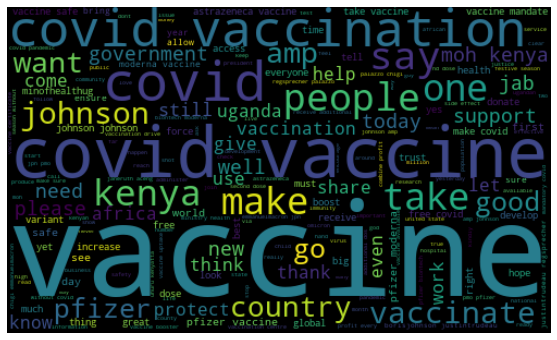

In [ ]:
#plotting the wordcount for positive sentiments
from wordcloud import WordCloud 

allWords= ''.join( [twts for twts in positive_wk['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
negative_wk.groupby('hour').agg('mean')

,year,month,day,minute,compound
hour,,,,,
0,2021.0,11.272727,12.181818,26.545455,-0.429927
1,2021.0,11.235294,12.882353,21.705882,-0.454182
2,2021.0,11.200000,13.000000,35.100000,-0.365463
3,2021.0,11.191176,15.308824,34.691176,-0.406588
4,2021.0,11.205882,16.696078,34.852941,-0.429403
5,2021.0,11.134752,15.609929,28.489362,-0.409943
6,2021.0,11.160622,14.274611,28.316062,-0.432616
7,2021.0,11.191083,14.108280,29.700637,-0.427326
8,2021.0,11.213415,16.048780,27.817073,-0.390790


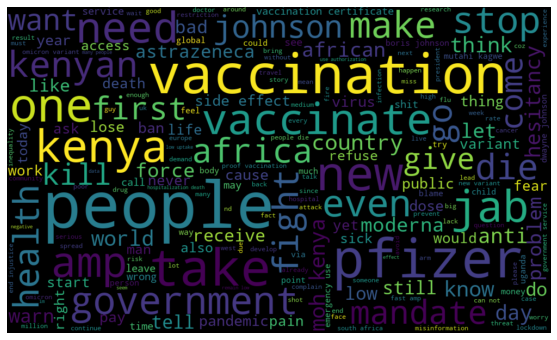

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 

allWords= ''.join( [twts for twts in negative_wk['clean_text']] )
WordCloud= WordCloud(width=1000, height=600, random_state=21, max_font_size=119, stopwords=['covid','vaccine','get','say','w']).generate(allWords)
plt.figure( figsize=(12,6), facecolor='w')
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Save the dataset with the sentiments

In [ ]:
eda.to_csv('Covid wk sentiments.csv')

Trendline

In [ ]:
neg= negative_wk.groupby(['date'],as_index=False).count()
pos = positive_wk.groupby(['date'],as_index=False).count()
pos = pos[['date','clean_text']]
neg = neg[['date','clean_text']]

In [ ]:
pos

,date,clean_text
0,2021-10-31,24
1,2021-11-01,84
2,2021-11-02,106
3,2021-11-03,121
4,2021-11-04,116
5,2021-11-05,103
6,2021-11-06,69
7,2021-11-07,75
8,2021-11-08,134
9,2021-11-09,90


In [ ]:
neg

,date,clean_text
0,2021-10-31,9
1,2021-11-01,41
2,2021-11-02,52
3,2021-11-03,66
4,2021-11-04,66
5,2021-11-05,71
6,2021-11-06,52
7,2021-11-07,31
8,2021-11-08,89
9,2021-11-09,51


Text(0.5, 1.0, 'Trend of vaccine sentiment')

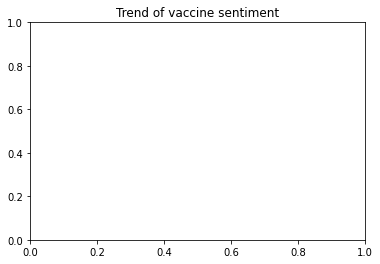

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['clean_text'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['clean_text'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )

fig.show()

